<a href="https://colab.research.google.com/github/Daya-1-sgr/ecommerce_transactions_datasets/blob/main/EDayaban_Sagar_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1.Customers Dataset

In [2]:
customers=pd.read_csv('/content/drive/MyDrive/ecommerce_transaction_datasets/Customers.csv')
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
customers.shape

(200, 4)

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


Converting signup date into datetime format

In [5]:
from datetime import datetime
customers['SignupDate']=pd.to_datetime(customers['SignupDate'])

In [6]:
customers.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [7]:
customers['Region'].nunique()

4

In [8]:
customers['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

Region Wise Distribution of Customers

In [9]:
customers.groupby('Region')['CustomerID'].nunique()

,CustomerID
Region,
Asia,45
Europe,50
North America,46
South America,59


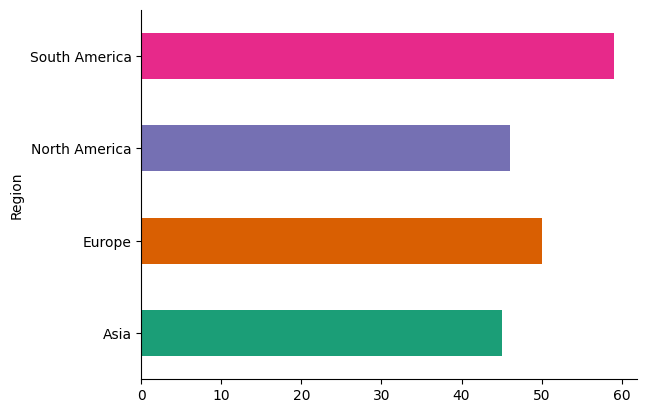

In [10]:
customers.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

Maximum number of customers are from South America Region

2.Products Dataset

In [11]:
products=pd.read_csv('/content/drive/MyDrive/ecommerce_transaction_datasets/Products.csv')
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [12]:
products.shape

(100, 4)

In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [14]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [15]:
products['Category'].nunique()

4

In [16]:
products['Category'].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

Category wise price distribution

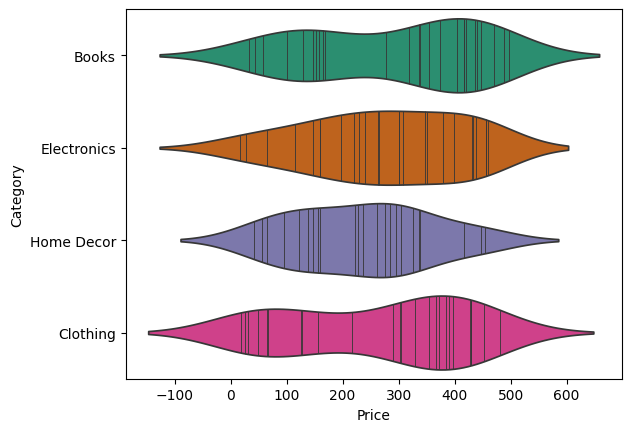

In [17]:
sns.violinplot(products, x='Price', y='Category', inner='stick', palette='Dark2')
plt.show()

Most books are in price range of 300 USD to 500 USD and same for clothing

Number of products per category

In [18]:
products["Category"].value_counts()

,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23


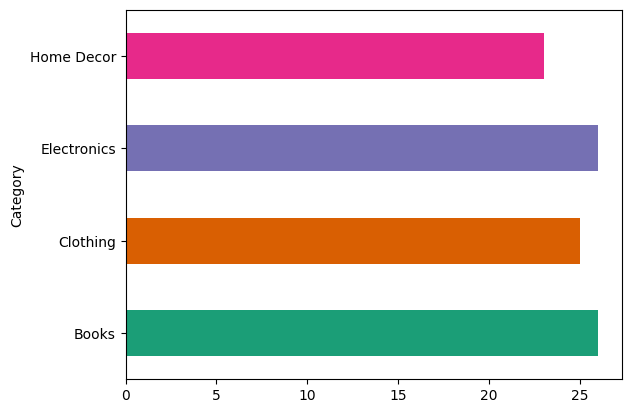

In [19]:
products.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

Books and Electronics category has the most number of products

3.Transactions Dataset

In [20]:
transactions=pd.read_csv('/content/drive/MyDrive/ecommerce_transaction_datasets/Transactions.csv')
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [21]:
transactions.shape

(1000, 7)

In [22]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [23]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


Let us convert the Transaction Date to a datetime format

In [24]:
from datetime import datetime
transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate'])

In [25]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


No of quantity bought in a single transaction

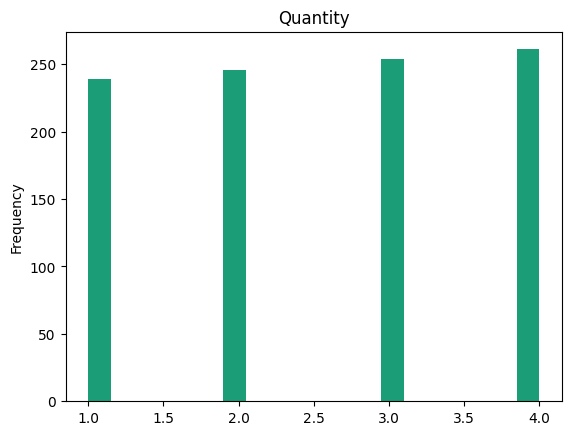

In [26]:
transactions['Quantity'].plot(kind='hist', bins=20, title='Quantity',color=sns.palettes.mpl_palette('Dark2'))
plt.show()

Number of products sold in a single is either 1,2,3 or 4 more or less uniformly distributed

In [27]:
transactions['CustomerID'].nunique()

199

One customer has not bought anything

In [28]:
transactions['ProductID'].nunique()

100

In [29]:
transactions['TransactionID'].nunique()

1000

Distribution of total transactional value

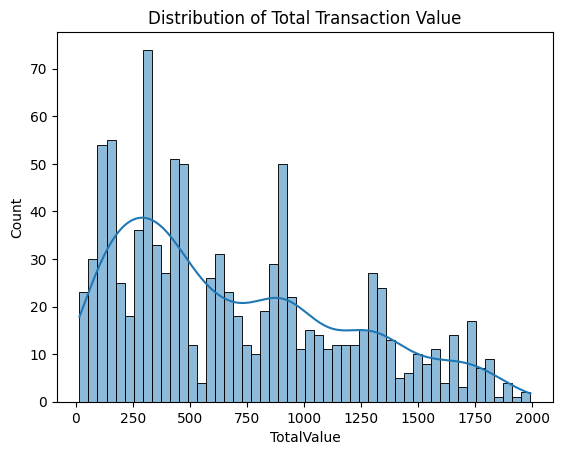

In [30]:
sns.histplot(transactions['TotalValue'], bins=50, kde=True)
plt.title('Distribution of Total Transaction Value')
plt.show()

There are no null values in the datasets

In [31]:
print("Duplicate Rows:")
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

Duplicate Rows:
0
0
0


There are no duplicated rows in the datasets as well

In [32]:
print("Unique Customers:", customers["CustomerID"].nunique())
print("Unique Products:", products["ProductID"].nunique())
print("Unique Transactions:", transactions["TransactionID"].nunique())

Unique Customers: 200
Unique Products: 100
Unique Transactions: 1000


4.Merged Data Details

In [33]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [34]:
merged_data.drop('Price_y',axis=1,inplace=True)
merged_data.rename(columns={'Price_x': 'ProductPrice'}, inplace=True)
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductPrice,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


Region wise sales

In [35]:
region_sales = merged_data.groupby("Region")["TotalValue"].sum()
region_sales

,TotalValue
Region,
Asia,152074.97
Europe,166254.63
North America,152313.40
South America,219352.56


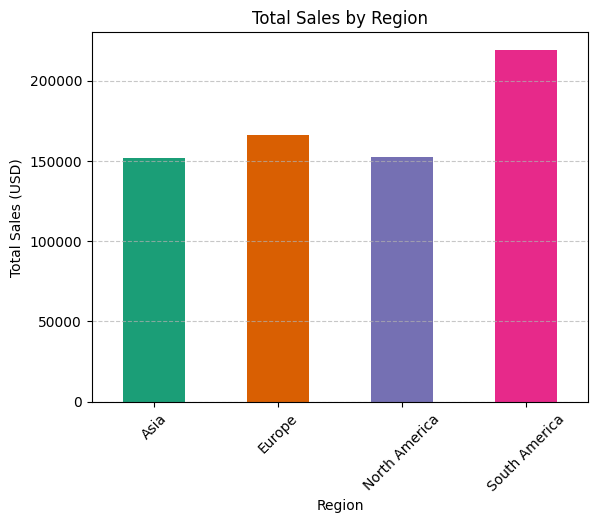

In [36]:
region_sales.plot(kind="bar", color=sns.palettes.mpl_palette("Dark2"))
plt.title("Total Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

South America Region has the most sales

Category Wise Sales

In [37]:
category_sales = merged_data.groupby("Category")["TotalValue"].sum()
category_sales

,TotalValue
Category,
Books,192147.47
Clothing,166170.66
Electronics,180783.50
Home Decor,150893.93


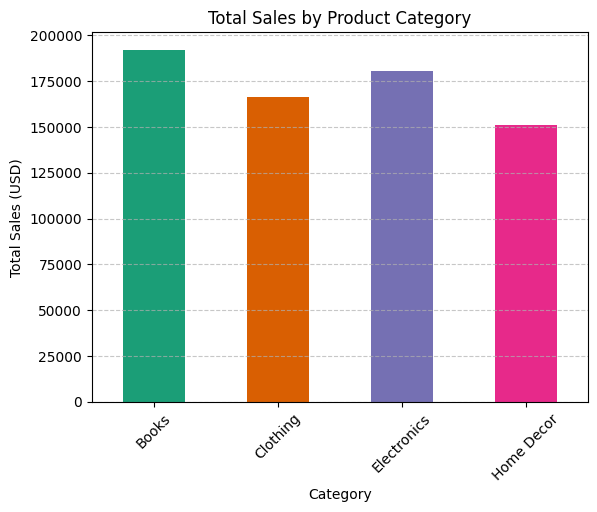

In [38]:
category_sales.plot(kind="bar", color=sns.palettes.mpl_palette("Dark2"))
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Books have the maximum sales

Monthly Sales distribution

In [39]:
monthly_sales = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()

monthly_sales

,TotalValue
TransactionDate,
2023-12,3769.52
2024-01,66376.39
2024-02,51459.27
2024-03,47828.73
2024-04,57519.06
2024-05,64527.74
2024-06,48771.18
2024-07,71366.39
2024-08,63436.74


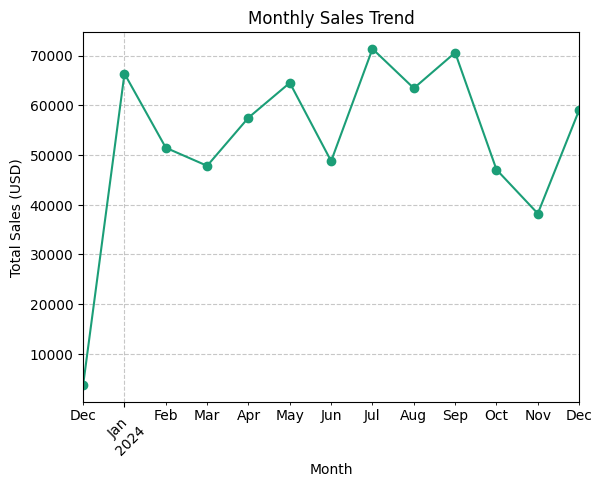

In [40]:
monthly_sales.plot(kind="line", marker="o", color=sns.palettes.mpl_palette("Dark2"))
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Monthly transactions are least on Dec 2023 and lows in march ,june and November 0f 2024.And highs being in January,May ,July and September 2024

Correlation between price ,quantity and total value

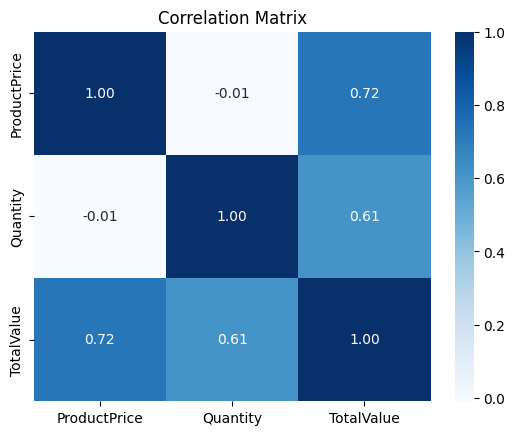

In [41]:
corr_matrix = merged_data[["ProductPrice", "Quantity", "TotalValue"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Region and Category wise Sales Distribution

In [42]:
region_category_sales = merged_data.groupby(["Region", "Category"])["TotalValue"].sum().unstack()
region_category_sales


Category,Books,Clothing,Electronics,Home Decor
Region,,,,
Asia,33119.03,49353.09,35658.15,33944.70
Europe,47464.42,36335.59,41562.60,40892.02
North America,41811.99,38038.49,44716.43,27746.49
South America,69752.03,42443.49,58846.32,48310.72


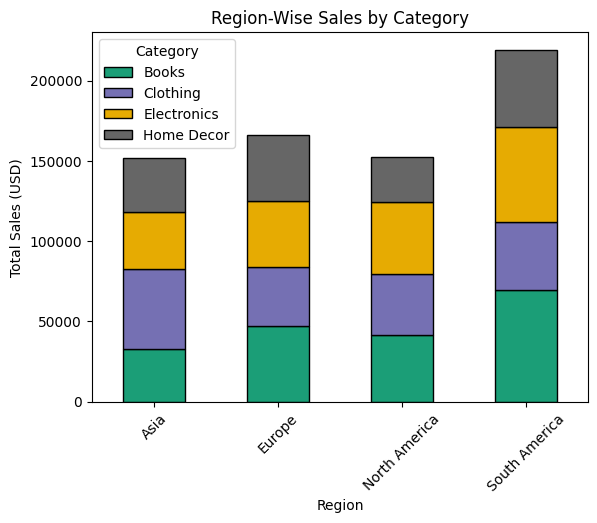

In [43]:
region_category_sales.plot(kind="bar", stacked=True, colormap="Dark2", edgecolor="black")
plt.title("Region-Wise Sales by Category")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.legend(title="Category", loc="upper left")
plt.show()


The sales in every category in South america is higher but Clothing Business in Asia is the Highest despite being lowest overall sales

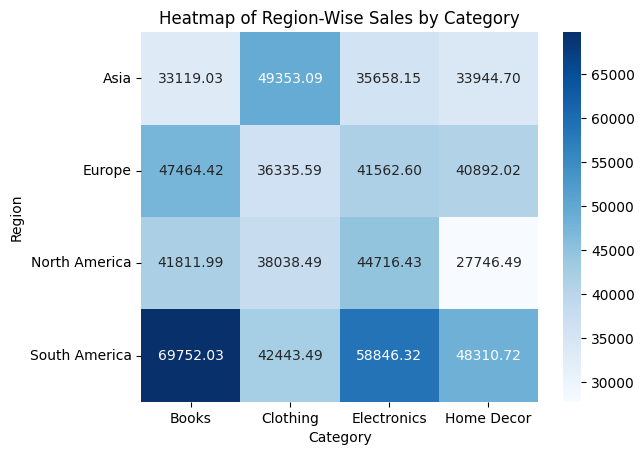

In [44]:
sns.heatmap(region_category_sales, annot=True, fmt=".2f", cmap="Blues")
plt.title("Heatmap of Region-Wise Sales by Category")
plt.xlabel("Category")
plt.ylabel("Region")
plt.show()


Most expensive and least expensive products in each category

In [45]:
least_costly_products = products.loc[products.groupby("Category")["Price"].idxmin()]
most_costly_products = products.loc[products.groupby("Category")["Price"].idxmax()]

least_costly_products = least_costly_products[["Category", "ProductName", "Price"]].rename(columns={"ProductName": "Least_Costly_Product", "Price": "Least_Price"})
most_costly_products = most_costly_products[["Category", "ProductName", "Price"]].rename(columns={"ProductName": "Most_Costly_Product", "Price": "Most_Price"})

category_cost_extremes = pd.merge(least_costly_products, most_costly_products, on="Category")

category_cost_extremes


,Category,Least_Costly_Product,Least_Price,Most_Costly_Product,Most_Price
0,Books,TechPro Novel,33.59,TechPro Textbook,497.76
1,Clothing,ActiveWear Running Shoes,18.82,SoundWave T-Shirt,481.78
2,Electronics,SoundWave Smartwatch,16.08,SoundWave Smartwatch,459.86
3,Home Decor,HomeSense Rug,41.18,ActiveWear Cookware Set,454.53


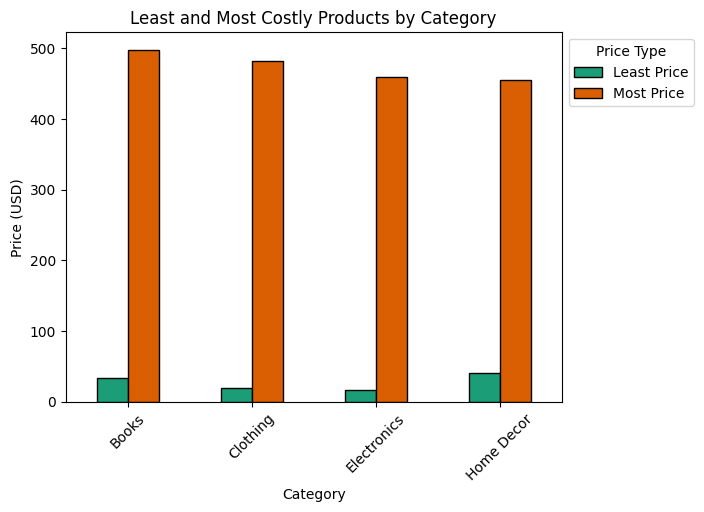

In [46]:
category_cost_extremes.plot(
    x="Category",
    y=["Least_Price", "Most_Price"],
    kind="bar",
    color=sns.palettes.mpl_palette("Dark2"),
    edgecolor="black"
)
plt.title("Least and Most Costly Products by Category")
plt.ylabel("Price (USD)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.legend(["Least Price", "Most Price"], title="Price Type", loc="upper left",bbox_to_anchor=(1, 1))
plt.show()


Top 3 and Bottom 3 selling products in each category

In [47]:
product_sales = transactions.groupby("ProductID")["Quantity"].sum().reset_index()
product_sales.rename(columns={"Quantity": "TotalQuantity"}, inplace=True)

product_sales_details = pd.merge(product_sales, products, on="ProductID")

def top_n_products(group, n=3):
    return group.nlargest(n, "TotalQuantity")[["ProductName", "Price", "TotalQuantity"]].reset_index(drop=True)

def bottom_n_products(group, n=3):
    return group.nsmallest(n, "TotalQuantity")[["ProductName", "Price", "TotalQuantity"]].reset_index(drop=True)

most_sold_products = product_sales_details.groupby("Category").apply(top_n_products, n=3).reset_index()
most_sold_products.rename(columns={"ProductName": "Most_Sold_Product", "Price": "Most_Sold_Cost", "TotalQuantity": "Most_Sold_Quantity"}, inplace=True)

least_sold_products = product_sales_details.groupby("Category").apply(bottom_n_products, n=3).reset_index()
least_sold_products.rename(columns={"ProductName": "Least_Sold_Product", "Price": "Least_Sold_Cost", "TotalQuantity": "Least_Sold_Quantity"}, inplace=True)

sales_extremes = pd.merge(most_sold_products, least_sold_products, on=["Category", "level_1"], suffixes=("_Most", "_Least"))

sales_extremes['Rank']=sales_extremes['level_1']+1
sales_extremes.drop('level_1',axis=1,inplace=True)
sales_extremes


,Category,Most_Sold_Product,Most_Sold_Cost,Most_Sold_Quantity,Least_Sold_Product,Least_Sold_Cost,Least_Sold_Quantity,Rank
0,Books,SoundWave Cookbook,57.30,46,SoundWave Mystery Book,354.29,11,1
1,Books,TechPro Cookbook,416.40,43,SoundWave Cookbook,338.66,12,2
2,Books,HomeSense Novel,374.16,39,ComfortLiving Biography,165.30,14,3
3,Clothing,SoundWave Jeans,303.20,46,ActiveWear Running Shoes,18.82,13,1
4,Clothing,ActiveWear Jacket,396.34,38,HomeSense T-Shirt,155.65,13,2
5,Clothing,ComfortLiving Sweater,385.37,35,ActiveWear Jacket,26.26,14,3
6,Electronics,TechPro Headphones,433.64,45,SoundWave Headphones,196.40,9,1
7,Electronics,ActiveWear Smartphone,239.70,43,ComfortLiving Headphones,159.60,15,2
8,Electronics,SoundWave Headphones,229.06,36,SoundWave Smartwatch,459.86,15,3
9,Home Decor,HomeSense Desk Lamp,156.96,43,BookWorld Wall Art,325.01,15,1


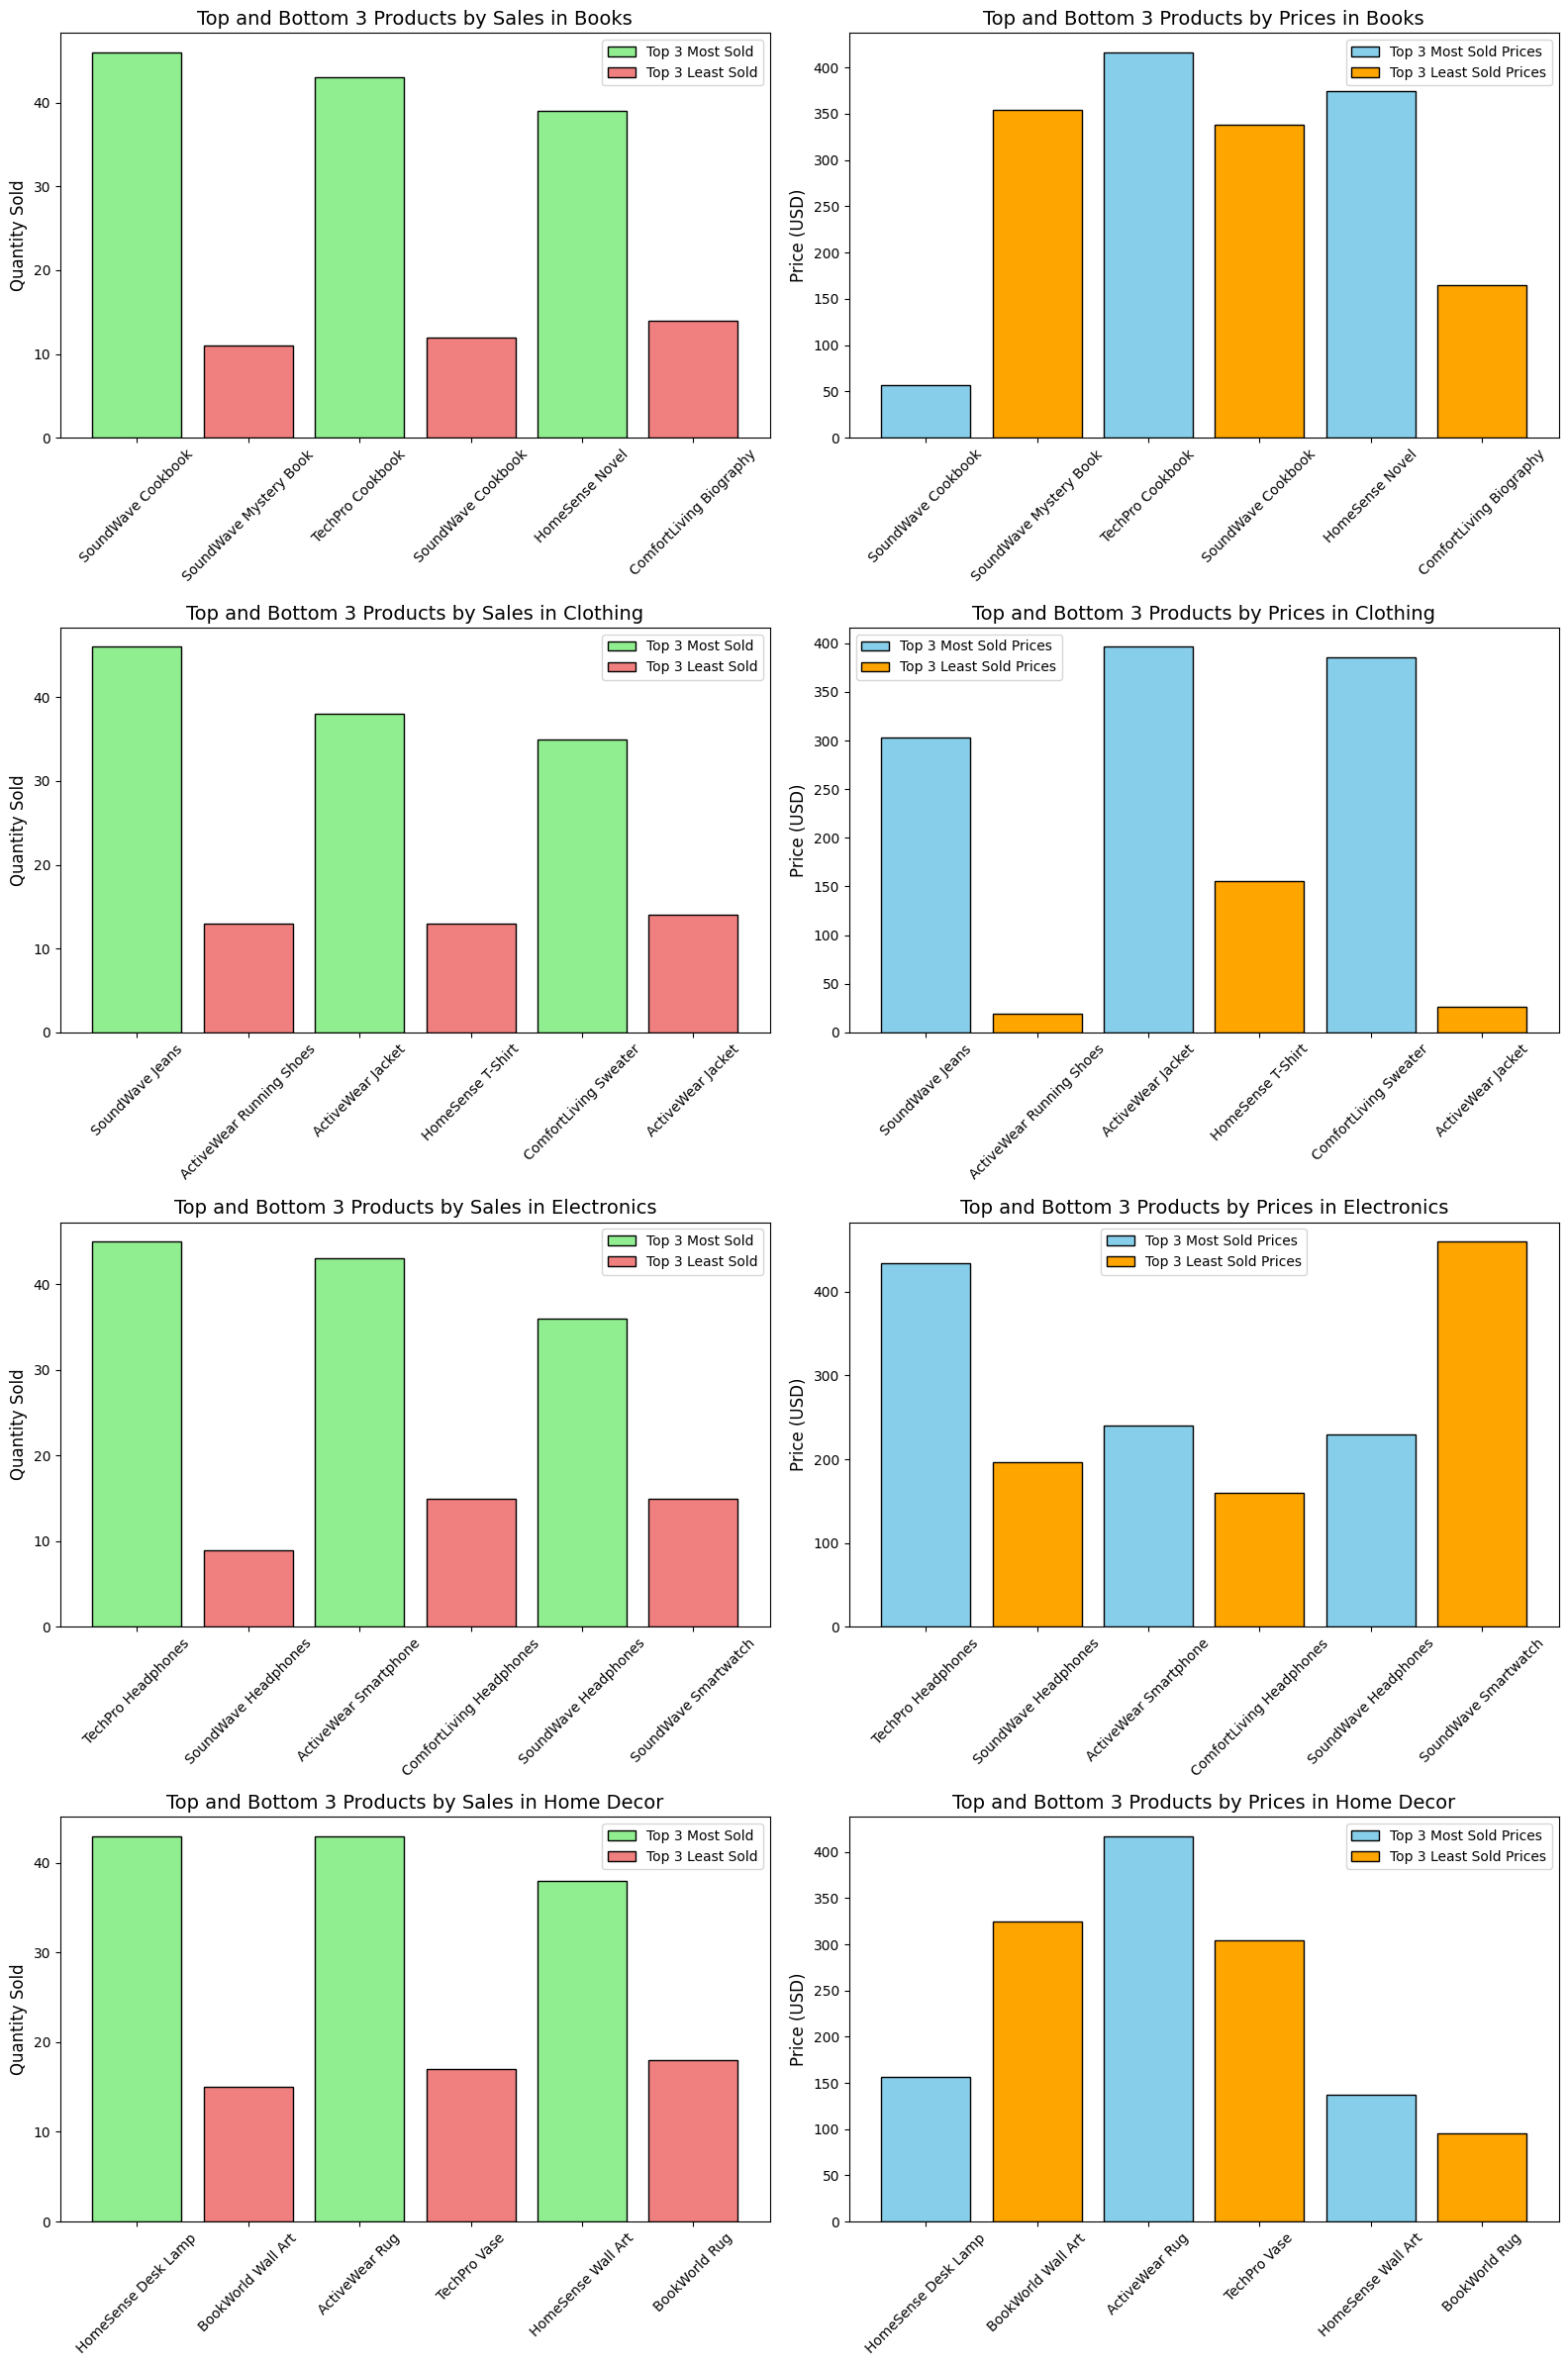

In [48]:
categories = sales_extremes["Category"].unique()
fig, axes = plt.subplots(4, 2, figsize=(16, 24))
for i, category in enumerate(categories):
    category_data = sales_extremes[sales_extremes["Category"] == category]
    axes[i, 0].bar(
        range(len(category_data) * 2)[::2],
        category_data["Most_Sold_Quantity"],
        color="lightgreen",
        edgecolor="black",
        label="Top 3 Most Sold"
    )
    axes[i, 0].bar(
        range(len(category_data) * 2)[1::2],
        category_data["Least_Sold_Quantity"],
        color="lightcoral",
        edgecolor="black",
        label="Top 3 Least Sold"
    )
    axes[i, 0].set_xticks(range(len(category_data) * 2))
    axes[i, 0].set_xticklabels(
        [item for sublist in zip(category_data["Most_Sold_Product"], category_data["Least_Sold_Product"]) for item in sublist], rotation=45
    )
    axes[i, 0].set_title(f"Top and Bottom 3 Products by Sales in {category}", fontsize=14)
    axes[i, 0].set_ylabel("Quantity Sold", fontsize=12)
    axes[i, 0].legend()

    axes[i, 1].bar(
        range(len(category_data) * 2)[::2],
        category_data["Most_Sold_Cost"],
        color="skyblue",
        edgecolor="black",
        label="Top 3 Most Sold Prices"
    )
    axes[i, 1].bar(
        range(len(category_data) * 2)[1::2],
        category_data["Least_Sold_Cost"],
        color="orange",
        edgecolor="black",
        label="Top 3 Least Sold Prices"
    )
    axes[i, 1].set_xticks(range(len(category_data) * 2))
    axes[i, 1].set_xticklabels(
        [item for sublist in zip(category_data["Most_Sold_Product"], category_data["Least_Sold_Product"]) for item in sublist], rotation=45
    )
    axes[i, 1].set_title(f"Top and Bottom 3 Products by Prices in {category}", fontsize=14)
    axes[i, 1].set_ylabel("Price (USD)", fontsize=12)
    axes[i, 1].legend()

fig.tight_layout()
plt.show()

We can see here that the most selling clothing products have higher prices and the least selling clothing products have very low prices

In [49]:
region_category_sales = merged_data.groupby(["Region", "Category", "ProductID", "ProductName", "ProductPrice"])["Quantity"].sum().reset_index()
region_category_sales.rename(columns={"Quantity": "TotalQuantity"}, inplace=True)

top_3_products = region_category_sales.groupby(["Region", "Category"]).apply(lambda x: x.nlargest(3, "TotalQuantity")).reset_index(drop=True)
bottom_3_products = region_category_sales.groupby(["Region", "Category"]).apply(lambda x: x.nsmallest(3, "TotalQuantity")).reset_index(drop=True)



List of top 3 products in each region and in each category

In [50]:
top_3_products

,Region,Category,ProductID,ProductName,ProductPrice,TotalQuantity
0,Asia,Books,P040,SoundWave Mystery Book,153.19,12
1,Asia,Books,P062,HomeSense Novel,374.16,10
2,Asia,Books,P063,TechPro Novel,33.59,10
3,Asia,Clothing,P076,ActiveWear Jeans,429.29,14
4,Asia,Clothing,P064,HomeSense Running Shoes,452.42,13
5,Asia,Clothing,P034,HomeSense T-Shirt,217.05,11
6,Asia,Electronics,P057,ActiveWear Smartphone,239.70,12
7,Asia,Electronics,P050,ActiveWear Smartwatch,437.65,10
8,Asia,Electronics,P015,HomeSense Headphones,158.93,9
9,Asia,Home Decor,P047,ComfortLiving Cookware Set,159.33,16


List of bottom 3 products in each region and each category

In [51]:
bottom_3_products

,Region,Category,ProductID,ProductName,ProductPrice,TotalQuantity
0,Asia,Books,P054,SoundWave Cookbook,57.30,1
1,Asia,Books,P001,ActiveWear Biography,169.30,2
2,Asia,Books,P024,SoundWave Cookbook,338.66,2
3,Asia,Clothing,P081,HomeSense Sweater,66.32,3
4,Asia,Clothing,P092,BookWorld Running Shoes,389.20,3
5,Asia,Clothing,P100,HomeSense Sweater,126.34,3
6,Asia,Electronics,P067,ComfortLiving Bluetooth Speaker,300.68,1
7,Asia,Electronics,P002,ActiveWear Smartwatch,346.30,2
8,Asia,Electronics,P029,TechPro Headphones,433.64,3
9,Asia,Home Decor,P022,HomeSense Wall Art,137.54,2


In [52]:
customer_metrics = transactions.groupby("CustomerID").agg(
    TotalSpend=("TotalValue", "sum"),
    TransactionCount=("TransactionID", "count"),
    AvgTransactionValue=("TotalValue", "mean"),
    LastTransactionDate=("TransactionDate", "max"),
).reset_index()

current_date = transactions["TransactionDate"].max()
customer_metrics["Recency"] = (current_date - customer_metrics["LastTransactionDate"]).dt.days

loyal_customers = customer_metrics[customer_metrics["TransactionCount"] >= customer_metrics["TransactionCount"].quantile(0.75)]
frequent_shoppers = customer_metrics[customer_metrics["Recency"] <= 30]
high_spenders = customer_metrics[customer_metrics["TotalSpend"] >= customer_metrics["TotalSpend"].quantile(0.75)]

customer_metrics["Segment"] = "Normal Customer"
customer_metrics.loc[customer_metrics["CustomerID"].isin(loyal_customers["CustomerID"]), "Segment"] = "Loyal Customer"
customer_metrics.loc[customer_metrics["CustomerID"].isin(frequent_shoppers["CustomerID"]), "Segment"] = "Frequent Shopper"
customer_metrics.loc[customer_metrics["CustomerID"].isin(high_spenders["CustomerID"]), "Segment"] = "High Spender"

customer_metrics['Segment'].value_counts()


,count
Segment,
Normal Customer,77
High Spender,50
Frequent Shopper,48
Loyal Customer,24


The total is 199 customers as one customer has not shopped yet

In [53]:
print(customer_metrics.sort_values("TotalSpend", ascending=False))

    CustomerID  TotalSpend  TransactionCount  AvgTransactionValue  \
140      C0141    10673.87                10          1067.387000   
53       C0054     8040.39                 8          1005.048750   
64       C0065     7663.70                10           766.370000   
155      C0156     7634.45                11           694.040909   
81       C0082     7572.91                 7          1081.844286   
..         ...         ...               ...                  ...   
13       C0014      318.66                 1           318.660000   
150      C0151      223.96                 1           223.960000   
96       C0097      137.54                 1           137.540000   
32       C0033      132.64                 1           132.640000   
59       C0060       82.36                 1            82.360000   

    LastTransactionDate  Recency           Segment  
140 2024-12-03 21:22:02       24      High Spender  
53  2024-10-07 17:48:28       81      High Spender  
64  2024-12-

The data for a year is given,so lets find the customer yearly value

In [54]:
customer_metrics["CYV"] = customer_metrics["TotalSpend"]


In [55]:
avg_customer_yearly_value=customer_metrics['CYV'].mean()
print(avg_customer_yearly_value)


3467.314371859297


On an average a customer buys 3467.314 USD worth of products from us every year

Relation between Cost of a product and No of Items sold

In [56]:
product_revenue = merged_data.groupby("ProductID").agg(
    TotalRevenue=('TotalValue', 'sum'),
    TotalQuantitySold=('Quantity', 'sum'),
    ProductPrice=('ProductPrice', 'mean')
).reset_index()

product_revenue

,ProductID,TotalRevenue,TotalQuantitySold,ProductPrice
0,P001,3047.40,18,169.30
1,P002,8657.50,25,346.30
2,P003,1367.72,31,44.12
3,P004,1722.42,18,95.69
4,P005,10303.44,24,429.31
...,...,...,...,...
95,P096,10453.98,34,307.47
96,P097,7983.50,25,319.34
97,P098,4798.88,16,299.93
98,P099,3897.19,11,354.29


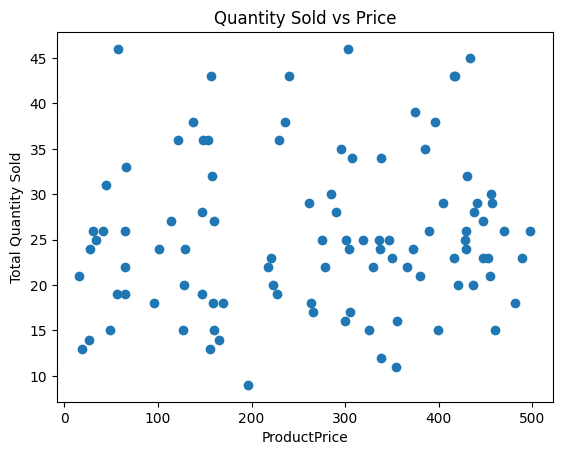

In [57]:
plt.scatter(product_revenue['ProductPrice'], product_revenue['TotalQuantitySold'])
plt.title('Quantity Sold vs Price')
plt.xlabel('ProductPrice')
plt.ylabel('Total Quantity Sold')
plt.show()

No clear trend can be seen for ProductPrice with respect to Quantity sold

Revenue generated per product

Top 5 product with most revenue generated

In [58]:
sorted_product_revenue = product_revenue.sort_values(by='TotalRevenue', ascending=False)
sorted_product_revenue[['ProductID', 'TotalRevenue', 'ProductPrice']].head()

,ProductID,TotalRevenue,ProductPrice
28,P029,19513.80,433.64
78,P079,17946.91,417.37
47,P048,17905.20,416.40
19,P020,15060.92,396.34
61,P062,14592.24,374.16


ProductID P029 i.e.,TechPro Headphones have generated the most revenue

Bottom 5 products with least revenue generated

In [59]:
reverse_sorted_product_revenue=sorted_product_revenue.sort_values(by='TotalRevenue',ascending=True)
reverse_sorted_product_revenue[['ProductID','TotalRevenue','ProductPrice']].head()

,ProductID,TotalRevenue,ProductPrice
43,P044,244.66,18.82
55,P056,337.68,16.08
13,P014,367.64,26.26
72,P073,647.76,26.99
69,P070,730.35,48.69


ProductID P044 i.e., ActiveWear Running Shoes have generated the least revenue

Top 10 products sold in number of products sold

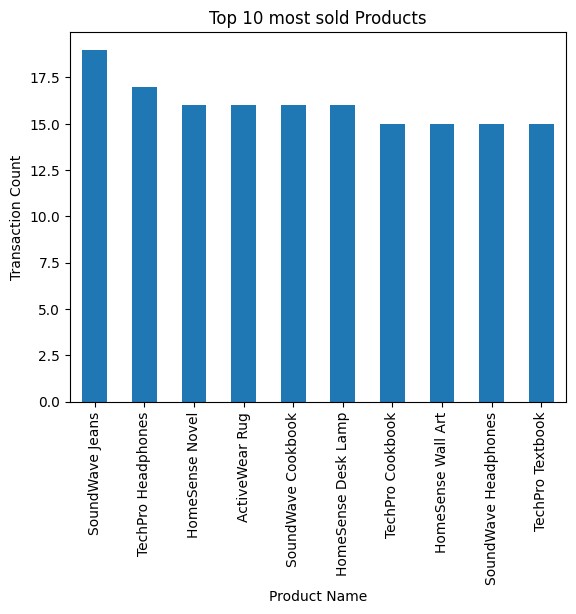

In [60]:
product_counts = transactions['ProductID'].value_counts().nlargest(10)
product_counts = pd.DataFrame({'ProductID': product_counts.index,'Count': product_counts.values})
product_counts = product_counts.merge(products[['ProductName', 'ProductID']], on='ProductID')
product_counts.set_index('ProductName', inplace=True)
product_counts['Count'].plot(kind='bar')
plt.title('Top 10 most sold Products')
plt.xlabel('Product Name')
plt.ylabel('Transaction Count')
plt.show()


Soundwave jeans are sold the most in numbers

Top 10 Customers based on transaction count

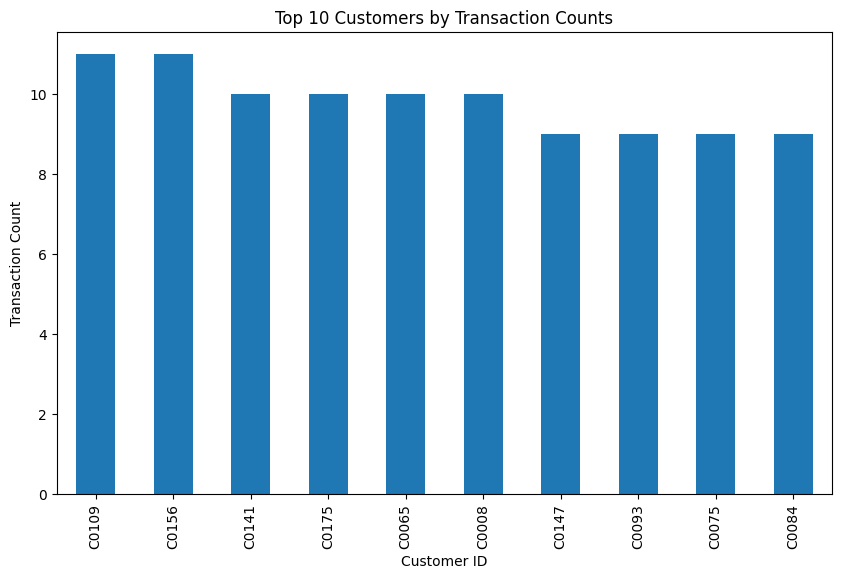

In [61]:
# Top customer transaction count
customer_counts = transactions['CustomerID'].value_counts().nlargest(10)
customer_counts.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Customers by Transaction Counts')
plt.xlabel('Customer ID')
plt.ylabel('Transaction Count')
plt.show()

Customer C0109-Abigail Jones from North America and Customer C0156-William Adams from North America has made the most number of transactions

Lets find the total revenue generated

In [62]:
total_revenue=transactions['TotalValue'].sum()
print(total_revenue)

689995.56


Check for how much revenue is generated from top 10 percent of customers

In [63]:
revenue_per_customer=transactions.groupby('CustomerID')['TotalValue'].sum()
print(revenue_per_customer)

CustomerID
C0001    3354.52
C0002    1862.74
C0003    2725.38
C0004    5354.88
C0005    2034.24
          ...   
C0196    4982.88
C0197    1928.65
C0198     931.83
C0199    1979.28
C0200    4758.60
Name: TotalValue, Length: 199, dtype: float64


In [64]:
sorted_revenue_per_customer=revenue_per_customer.sort_values(ascending=False)
print(sorted_revenue_per_customer)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
           ...   
C0014      318.66
C0151      223.96
C0097      137.54
C0033      132.64
C0060       82.36
Name: TotalValue, Length: 199, dtype: float64


In [65]:
sorted_revenue_per_customer.head()

,TotalValue
CustomerID,
C0141,10673.87
C0054,8040.39
C0065,7663.70
C0156,7634.45
C0082,7572.91


In [66]:
sorted_revenue_per_customer_df=pd.DataFrame(sorted_revenue_per_customer)
print(sorted_revenue_per_customer_df)

            TotalValue
CustomerID            
C0141         10673.87
C0054          8040.39
C0065          7663.70
C0156          7634.45
C0082          7572.91
...                ...
C0014           318.66
C0151           223.96
C0097           137.54
C0033           132.64
C0060            82.36

[199 rows x 1 columns]


In [67]:
threshold=sorted_revenue_per_customer_df['TotalValue'].quantile(0.90)
print(threshold)

5869.260000000002


In [68]:
top_10_customers=sorted_revenue_per_customer_df[sorted_revenue_per_customer_df['TotalValue']>threshold]
print(top_10_customers)

            TotalValue
CustomerID            
C0141         10673.87
C0054          8040.39
C0065          7663.70
C0156          7634.45
C0082          7572.91
C0188          7111.32
C0059          7073.28
C0028          6819.57
C0099          6715.72
C0165          6708.10
C0087          6604.23
C0104          6579.10
C0175          6210.53
C0041          6149.78
C0102          6132.36
C0096          6072.92
C0143          6044.63
C0045          6021.80
C0013          6000.56
C0068          5950.42


In [69]:
sum_top_10_customers=top_10_customers['TotalValue'].sum()

In [70]:
print(sum_top_10_customers)

137779.64


In [71]:
print((sum_top_10_customers/total_revenue)*100,"%")

19.96819225909222 %


So top 10 percent of customers have generated approximately 20% of the revenue which is pretty normal

Check how much revenue is generated from top 10 percent of the products

In [72]:
threshold=sorted_product_revenue['TotalRevenue'].quantile(0.90)
print(threshold)

12970.796000000002


In [73]:
top_10_products=sorted_product_revenue[sorted_product_revenue['TotalRevenue']>threshold]
print(top_10_products)

   ProductID  TotalRevenue  TotalQuantitySold  ProductPrice
28      P029      19513.80                 45        433.64
78      P079      17946.91                 43        417.37
47      P048      17905.20                 43        416.40
19      P020      15060.92                 38        396.34
61      P062      14592.24                 39        374.16
58      P059      13947.20                 46        303.20
38      P039      13778.88                 32        430.59
82      P083      13671.60                 30        455.72
18      P019      13487.95                 35        385.37
40      P041      13232.12                 29        456.28


In [74]:
sum_top_10_products=top_10_products['TotalRevenue'].sum()
print(sum_top_10_products)

153136.81999999998


In [75]:
print((sum_top_10_products/total_revenue)*100,"%")

22.1938848418097 %


So top 10 percent of products also have generated approximately 22 percent of the revenue which is normal